# Manejo de datos - Proyecto Final - Rodrigo López Hernández 
# Capítulo 13: Análisis de información de documentos semiestructurados/Parsing information from semistructured documents

**Objetivo principal del capítulo:** Mostrar cómo realizar la recopilación, procesamiento y limpieza de datos de una base de datos climáticos provenientes de archivos de texto descargados desde un servidor FTP, para obtener un archivo ".csv" que sea manejable para cualquier análisis estadístico. 

**Problemas principales del capítulo:** Los datos disponibles en archivos de texto están semiestructurados, es decir, no se pueden incorporar directamente en R debido a su formato heterogéneo y poco fácil de manipular. A diferencia de un .csv éstos archivos de texto no están diseñados/preparados para ser trabajados como "dataset", podemos encontrar varias comas consecutivas, espacios vacíos, columnas con datos junto a más datos, entre otros. Para resolverlo, el enfoque consiste en utilizar R para limpiar y convertir estos archivos en estructuras de datos ordenadas y analizables.

Sin embargo, el servidor FTP, al cual el capítulo hace referencia, fue removido y no es posible consultarlo de la forma en la que la sección 13.1 lo sugiere. Para resolver este problema, se consultó el sitio oficial de datos climáticos que ofrece el Servicio de Conservación de Recursos Naturales del Departamento de Agricultura de los Estados Unidos, particularmente los datos del estado de California. Cada archivo contiene información diaria de datos climáticos desde los años 80's aproximadamente. Las entidades encargadas de recopilar estos datos se llaman "estaciones" y están dispersas a lo largo del estado de california, el libro hace uso de la información de seis estaciones: ADIN MTN,  INDEPENDENCE CAMP,  SQUAW VALLEY,  SPRATT CREEK,  LEAVITT MEADOWS,  POISON FLAT. Para el caso de SQUAW VALLEY, ésta se sustituyó por HAGAN'S MEADOW dado que la información de SQUAW VALLEY ya no existe.

En este Notebook únicamente se trabajó con la estación HAGAN'S MEADOW por practicidad de la extensión del código. Sin embargo, se puede trabajar perfectamente con cualquier estación. Para hacerlo sólo es necesario descargar el .txt correspondiente y cambiar la línea de código que se encarga de leer dicho .txt., así como los encabezados de los gráficos correspondiente, la estructura de la limpieza es la misma. A continuación se explica cómo se hizo la  limpieza y tratamiento de los datos. 

## Descargar los archivos del sitio web

* Accedemos al sitio oficial: https://wcc.sc.egov.usda.gov/nwcc/rgrpt?report=temperature_hist&state=CA.
* Seleccionamos la estación correspondiente, en el caso del libro sugiere "HAGAN'S MEADOW".
* El sitio imprimirá en la pantalla datos con respecto al clima. Dado que no se proporciona una manera de descargarlo en ningún formato, se optó por copiar el contenido impreso y colocarlo en archivo .txt.
* El archivo .txt se nombró como "data1.txt", posterior a esto se comienza el tratamiento en R. 

In [189]:
# Creamos un vector de líneas.
# Cada línea de texto del archivo "data1.txt" es un elemento del vector Vlíneas. 

Vlineas <- readLines("data1.txt")
cat("Los elementos de Vlineas es: ", length(Vlineas), "\n")

print(head(Vlineas))

Los elementos de Vlineas es:  1272 
[1] "#------------------------------------------------- WARNING --------------------------------------------"
[2] "# "                                                                                                     
[3] "# The data you have obtained from this automated Natural Resources Conservation Service "               
[4] "# database are subject to revision regardless of indicated Quality Assurance level. "                   
[5] "# Data are released on condition that neither the NRCS nor the United States Government "               
[6] "# may be held liable for any damages resulting from its use. "                                          


In [190]:
# En el archivo de texto hay elementos que no nos sirven por ejemplo, las líneas vacías o las líneas que comienzan por "#" 
# donde sólo hay descripción de la información de los datos climáticos. Éstos elementos deben ser eliminados del archivo
# de texto para poder manipular correctamente los datos. 

# Para hacerlo empleamos la función "grepl( - )" para buscar patrones de texto en cada elemento del vector "Vlineas".
# Vamos a conservar aquellas líneas que NO cumplan con la condición de que: 
#  - "\\s*" (tenga cero o mas veces espacios en blanco) ó
#  - "#" (tenga un "#" al inicio de la línea)

VlineasL <- Vlineas[!grepl("^\\s*$|^#", Vlineas)]
cat("Los elementos de VlineasL es: ", length(VlineasL), "\n")

print(head(VlineasL))

Los elementos de VlineasL es:  1211 
[1] "Water Year,Day,Oct,Oct,Oct,Nov,Nov,Nov,Dec,Dec,Dec,Jan,Jan,Jan,Feb,Feb,Feb,Mar,Mar,Mar,Apr,Apr,Apr,May,May,May,Jun,Jun,Jun,Jul,Jul,Jul,Aug,Aug,Aug,Sep,Sep,Sep"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [191]:
# Una vez que ya se limpiaron las líneas en blanco, vamos a preparar el archivo para ser manipulado. Vamos a extraer los años
# del archivo de texto. Empleamos nuevamente la función "grepl( - , TRUE)" para extraer las líneas completas que coincidan con el patrón: 
# - \\d{4} (dígitos numéricos que tengan exactamente 4 posiciones, los años).

Danho <- grep("^\\d{4}", VlineasL, value = TRUE)

In [192]:
# Separamos los años por comas. 

Dcomas <- strsplit(Danho, split = ",")
print(head(Dcomas))

[[1]]
 [1] "1987" "01"   "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" "32.0"
[11] "32.0" ""     ""     ""     "32.0" "32.0" "32.0" ""     ""     ""    
[21] ""     ""     ""     "32.0" "32.0" "32.0" ""     ""     ""     "33.6"
[31] ""     "52.3" "37.6" "80.6" "56.8" "40.5" "75.4" "52.7"

[[2]]
 [1] "1987" "02"   "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" "32.0"
[11] "32.0" ""     ""     ""     ""     ""     ""     ""     ""     ""    
[21] ""     ""     ""     ""     ""     ""     ""     ""     ""     ""    
[31] ""     ""     "39.6" "82.6" "59.4" "37.9" "71.8" "52.7"

[[3]]
 [1] "1987" "03"   "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" "32.0"
[11] "32.0" ""     ""     ""     ""     ""     ""     ""     ""     ""    
[21] "32.0" "32.0" "32.0" "32.0" "32.0" "32.0" ""     ""     ""     ""    
[31] ""     ""     "40.1" "81.1" "59.5" "37.0" "70.2" "51.8"

[[4]]
 [1] "1987"  "04"    "32.0"  "32.0"  "32.0"  "32.0"  "32.0"  "32.0"  "32.0" 
[10] "32.0"  "32.0"  ""      ""      "

In [193]:
# Con los datos separador por comas, ahora vamos a elaborar un dataframe (df) para una mejor manipulación de los datos. 
# Vamos a emplear la función "do.call( - )" para unir una lista de vectores en una sola matriz Así mismo, usaremos la 
# función rbind( - ) para unir por filas dichos vectores en una sola matriz
# Después emplearemos as.data.frame( - ) para convertir la matriz en una tabla. "stringsAsFactors = FALSE" evita que las variables se vuelvan 
# categoricas. 

df <- do.call(rbind, Dcomas)
df <- as.data.frame(df, stringsAsFactors = FALSE)
print(head(df))

Warning message in (function (..., deparse.level = 1) :
"number of columns of result is not a multiple of vector length (arg 26)"


    V1 V2   V3   V4   V5   V6   V7   V8   V9  V10  V11 V12 V13 V14  V15  V16
1 1987 01 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0             32.0 32.0
2 1987 02 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0                      
3 1987 03 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0                      
4 1987 04 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0                      
5 1987 05 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0                      
6 1987 06 32.0 32.0 32.0                                                    
   V17 V18 V19 V20  V21  V22  V23  V24  V25  V26 V27 V28 V29  V30 V31  V32
1 32.0                            32.0 32.0 32.0             33.6     52.3
2                                                                         
3                  32.0 32.0 32.0 32.0 32.0 32.0                          
4                                 32.0 32.0 32.0                          
5                  32.0 32.0 32.0 32.0 32.0 32.0                          
6          

In [194]:
# Para dar forma al data frame, damos nombre a las columnas. 

colnames(df) <- c("Año", "Día", "Oct_Min", "Oct_Max", "Oct_Prom", "Nov_Min", "Nov_Max", "Nov_Prom", 
                        "Dic_Min", "Dic_Max", "Dic_Prom", "Ene_Min", "Ene_Max", "Ene_Prom", "Feb_Min", 
                        "Feb_Max", "Feb_Prom", "Mar_Min", "Mar_Max", "Mar_Prom", "Abr_Min", "Abr_Max", 
                        "Abr_Prom", "May_Min", "May_Max", "May_Prom", "Jun_Min", "Jun_Max", "Jun_Prom", 
                        "Jul_Min", "Jul_Max", "Jul_Prom", "Ago_Min", "Ago_Max", "Ago_Prom", 
                        "Sep_Min", "Sep_Max", "Sep_Prom")
print(head(df))

   Año Día Oct_Min Oct_Max Oct_Prom Nov_Min Nov_Max Nov_Prom Dic_Min Dic_Max
1 1987  01    32.0    32.0     32.0    32.0    32.0     32.0    32.0    32.0
2 1987  02    32.0    32.0     32.0    32.0    32.0     32.0    32.0    32.0
3 1987  03    32.0    32.0     32.0    32.0    32.0     32.0    32.0    32.0
4 1987  04    32.0    32.0     32.0    32.0    32.0     32.0    32.0    32.0
5 1987  05    32.0    32.0     32.0    32.0    32.0     32.0    32.0    32.0
6 1987  06    32.0    32.0     32.0                                         
  Dic_Prom Ene_Min Ene_Max Ene_Prom Feb_Min Feb_Max Feb_Prom Mar_Min Mar_Max
1     32.0                             32.0    32.0     32.0                
2     32.0                                                                  
3     32.0                                                                  
4     32.0                                                                  
5     32.0                                                                  

In [195]:
# Vamos a convertir los valores del dataframe a valores con formato numérico, aquellas entradas vacías del dataframe se les 
# asignará "NA".

for (i in 1:ncol(df)) {
  df[[i]] <- as.numeric(df[[i]])
}

print(head(df))

   Año Día Oct_Min Oct_Max Oct_Prom Nov_Min Nov_Max Nov_Prom Dic_Min Dic_Max
1 1987   1      32      32       32      32      32       32      32      32
2 1987   2      32      32       32      32      32       32      32      32
3 1987   3      32      32       32      32      32       32      32      32
4 1987   4      32      32       32      32      32       32      32      32
5 1987   5      32      32       32      32      32       32      32      32
6 1987   6      32      32       32      NA      NA       NA      NA      NA
  Dic_Prom Ene_Min Ene_Max Ene_Prom Feb_Min Feb_Max Feb_Prom Mar_Min Mar_Max
1       32      NA      NA       NA      32      32       32      NA      NA
2       32      NA      NA       NA      NA      NA       NA      NA      NA
3       32      NA      NA       NA      NA      NA       NA      NA      NA
4       32      NA      NA       NA      NA      NA       NA      NA      NA
5       32      NA      NA       NA      NA      NA       NA      NA      NA

In [196]:
# Exportamos un CSV 

write.csv(df, "base_limpia1.csv", row.names = FALSE)

In [197]:
# Calcular promedio mensual para todos los años.
# Empleamos la función "grep( - )" para buscar las columnas que posean valores de promedios. 
# Asignamos un valor de "na.rm = TRUE" para descartar los valores con "NA".

prom_mensual <- colMeans(df[, grep("_Prom", colnames(df))], na.rm = TRUE)
print(prom_mensual)

# Reorganizamos el vector de promedios dado que nuestros valores comienzan por el mes de octubre y es conveniente hacerlo con enero.
meses_ordenados <- c("Ene_Prom", "Feb_Prom", "Mar_Prom", "Abr_Prom", "May_Prom", "Jun_Prom", 
                     "Jul_Prom", "Ago_Prom", "Sep_Prom", "Oct_Prom", "Nov_Prom", "Dic_Prom")
prom_mensual_ordenado <- prom_mensual[meses_ordenados]
print(prom_mensual_ordenado)

# Creamos un dataframe para graficar
meses <- 1:12
df_grafica <- data.frame(
  Mes = factor(month.abb, levels = month.abb),
  Temperatura_Promedio = prom_mensual_ordenado
)

 Oct_Prom  Nov_Prom  Dic_Prom  Ene_Prom  Feb_Prom  Mar_Prom  Abr_Prom  May_Prom 
 39.98968  31.15052  25.31684  25.94289  26.53100  30.40391  34.73292  41.50418 
 Jun_Prom  Jul_Prom  Ago_Prom  Sep_Prom 
 50.04781  56.18789  54.97421 171.12440 
 Ene_Prom  Feb_Prom  Mar_Prom  Abr_Prom  May_Prom  Jun_Prom  Jul_Prom  Ago_Prom 
 25.94289  26.53100  30.40391  34.73292  41.50418  50.04781  56.18789  54.97421 
 Sep_Prom  Oct_Prom  Nov_Prom  Dic_Prom 
171.12440  39.98968  31.15052  25.31684 


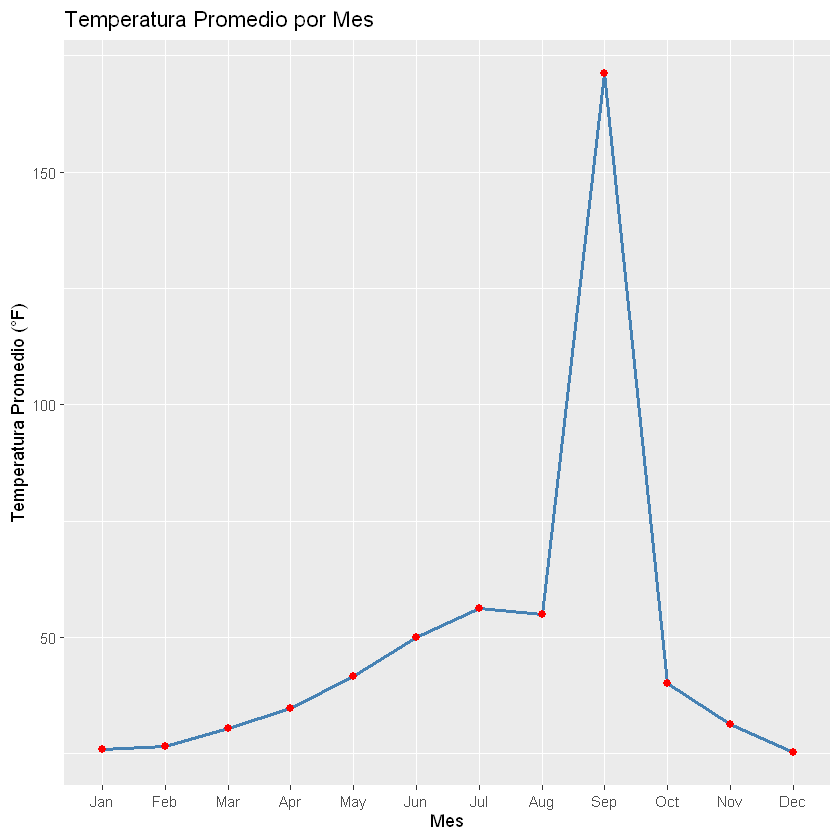

In [198]:
# Graficamos los datos obtenidos
library(ggplot2)
ggplot(df_grafica, aes(x = Mes, y = Temperatura_Promedio)) +
  geom_line(group = 1, color = "steelblue", size = 1) +
  geom_point(color = "red", size = 2) +
  labs(title = "Temperatura Promedio por Mes",
       x = "Mes",
       y = "Temperatura Promedio (°F)") 

In [199]:
# Vemos ahora un punto atípico en la gráfica, esto se debe a un llenado erroneo de las celdas en el CSV generado. 
# Al parecer, para el mes de septiembre, cuando las variables de temperatura mínima y máxima toman un valor de "NA", 
# se autorellena con el valor de año correspondiente, es decir, 1990, 2020, 2025, entre otros. Por ello el valor del promedio
# es demasiado alto. Para esto vamos a descartar todos estos valores atípicos. 
# Vamos entones a detectar valores con exactamente 4 dígitos sin decimales en la columna Sep_Prom

filtro_4_digitos <- grepl("^\\d{4}$", df$Sep_Prom)
df$Sep_Prom[filtro_4_digitos] <- NA
print(df$Sep_Prom)


   [1] 52.7 52.7 51.8 49.3 50.7 49.5 49.1 51.3 51.1 48.9 48.9 49.3 48.2 48.2
  [15] 46.6 45.0 46.9 48.7 50.4 52.7 57.2 55.9 52.2 50.7 52.9   NA 34.2 50.2
  [29] 49.1 49.3   NA 57.0 59.0 59.5 60.6 59.9 59.2 59.2 56.8 52.0 50.9 44.8
  [43] 44.1 43.7 48.0 48.7 47.3 43.3 42.6 46.2 37.9 41.2 43.2 44.6 45.1 50.0
  [57] 47.7 44.4 48.9 48.9 50.5   NA 47.8 48.6 49.6 51.1 50.7 53.4 42.8 47.3
  [71] 48.2 49.8 44.4 45.7 48.0 50.7 36.1 48.0 37.4 35.1 40.5 43.5 47.1 49.3
  [85] 49.6 53.4 51.6 49.6 53.8 46.8 42.6 40.3   NA 51.3 53.4 52.0 54.7 54.3
  [99] 54.0 52.3 53.2 55.4 56.1 54.5 53.8 56.3 55.9 48.6 43.9 45.3 44.4 45.9
 [113] 48.7 53.1 48.9 32.2 39.7 43.0 45.0 42.3 47.3 52.3 49.1   NA 53.4 56.3
 [127] 54.0 48.9 53.4 49.3 48.0 48.7 44.6 40.3 43.9 44.4 46.9 49.3 50.5 50.2
 [141] 52.9 54.1 54.7 53.2   NA 50.7 51.1 51.4 52.0 52.2 46.2 46.6 50.2 50.4
 [155]   NA 47.1 49.3 43.9 43.7 46.0 46.9 46.6 48.9 52.7 54.7 51.8 46.0 46.4
 [169] 46.2 47.3 49.5 46.2 45.1 47.3 48.9 53.4 54.5 53.4 49.8 42.6 45.7 49.3

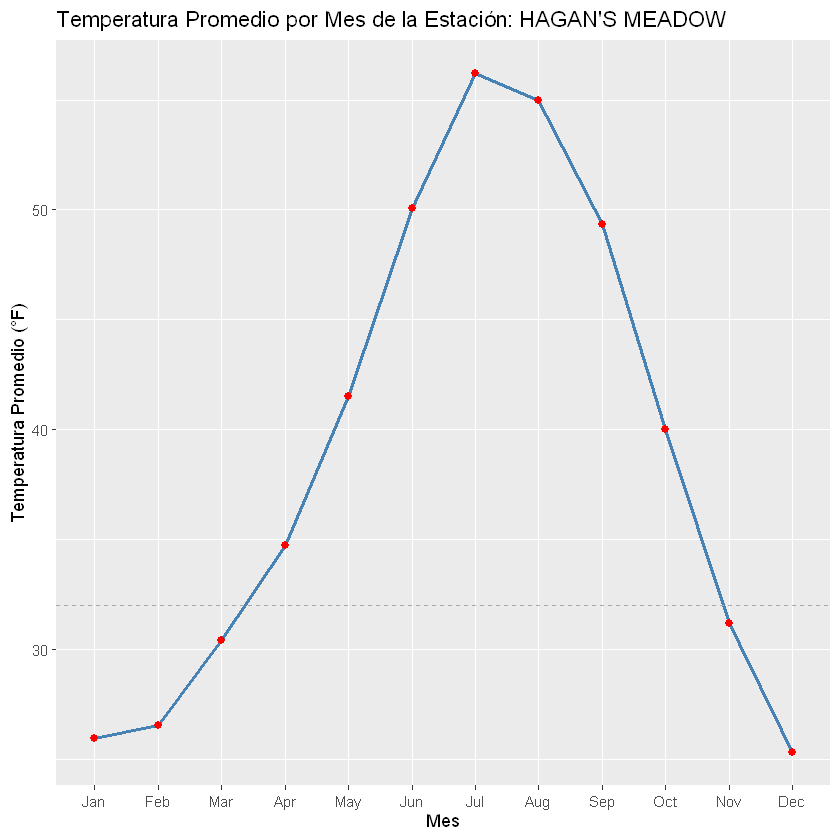

In [200]:
# Ejecutamos nuevamente las antepenultimas lineas de codigo para ver el gráfico final.
prom_mensual <- colMeans(df[, grep("_Prom", colnames(df))], na.rm = TRUE)
meses_ordenados <- c("Ene_Prom", "Feb_Prom", "Mar_Prom", "Abr_Prom", "May_Prom", "Jun_Prom", 
                     "Jul_Prom", "Ago_Prom", "Sep_Prom", "Oct_Prom", "Nov_Prom", "Dic_Prom")
prom_mensual_ordenado <- prom_mensual[meses_ordenados]
meses <- 1:12
df_grafica <- data.frame(
  Mes = factor(month.abb, levels = month.abb),
  Temperatura_Promedio = prom_mensual_ordenado
)
library(ggplot2)
ggplot(df_grafica, aes(x = Mes, y = Temperatura_Promedio)) +
  geom_line(group = 1, color = "steelblue", size = 1) +
  geom_point(color = "red", size = 2) +
  geom_hline(yintercept = 32, linetype = "dashed", color = "darkgray") +
  labs(title = "Temperatura Promedio por Mes de la Estación: HAGAN'S MEADOW",
       x = "Mes",
       y = "Temperatura Promedio (°F)") 

In [201]:
# Finalmente generamos el CSV final con todo el procesamiento de datos

write.csv(df, "base_limpia_final1.csv", row.names = FALSE)

## Resultados

Podemos observar que derivado de la limpieza de datos se obtuvo un archivo ".csv" manejable para realizar cualquier análisis estadístico. Ahora los datos están ordenados de una forma en la que cualquier análista de datos puede emplearlos y realizar las estadísticas requeridas. 

## Conclusión

En conclusión es importante tener buenos conocimientos sobre manipulaciones de datos ya que no siempre las bases de datos se encuentran en un estado óptimo para su uso. Así mismo, es importante saber localizar alternativas a las fuentes de datos, ya que como se muestra en este capítulo muchas veces los servidores dejan de estar disponibles. 